In [1]:
import keras
import pandas as pd
import numpy as np
import glob

Using TensorFlow backend.


# load data

In [2]:
basic_path = glob.glob("C:\\Users\\Owner\\Desktop\\DataSet\\*.data")

In [3]:
basic_path

['C:\\Users\\Owner\\Desktop\\DataSet\\wdbc.data',
 'C:\\Users\\Owner\\Desktop\\DataSet\\wpbc.data']

In [4]:
wdbc_path = basic_path[0]

In [5]:
col_name = ["Id","Diagnosis",1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [6]:
wdbc_data = pd.read_csv(wdbc_path,names = col_name)

# delete Id

In [7]:
del wdbc_data["Id"]

train_data = wdbc_data.loc[0:468]

test_data = wdbc_data.loc[469:]

## test / train --> data / label

In [8]:
train_label = train_data["Diagnosis"]

del train_data["Diagnosis"]

test_label = test_data["Diagnosis"]

del test_data["Diagnosis"]

test_label = list(test_label)

train_label = list(train_label)

# Normalization

In [9]:
train_data.std()

1       3.526356
2       4.178355
3      24.331985
4     354.946645
5       0.013686
6       0.053820
7       0.081182
8       0.039311
9       0.027986
10      0.006959
11      0.287193
12      0.530302
13      2.095255
14     47.802886
15      0.002960
16      0.018690
17      0.031822
18      0.006241
19      0.008642
20      0.002767
21      4.885614
22      6.109281
23     33.896389
24    581.650616
25      0.022810
26      0.162050
27      0.212075
28      0.066786
29      0.064040
30      0.018436
dtype: float64

In [10]:
train_data.max()

1       28.11000
2       39.28000
3      188.50000
4     2501.00000
5        0.14470
6        0.34540
7        0.42680
8        0.20120
9        0.30400
10       0.09744
11       2.87300
12       4.88500
13      21.98000
14     542.20000
15       0.03113
16       0.13540
17       0.39600
18       0.05279
19       0.07895
20       0.02984
21      36.04000
22      49.54000
23     251.20000
24    4254.00000
25       0.22260
26       1.05800
27       1.25200
28       0.29100
29       0.66380
30       0.20750
dtype: float64

In [11]:
def Normalization(col_data,std,mean):
    col_data -= mean
    col_data /= std
    return col_data

In [12]:
# 수정 전
# for i in range(1,30):
#     col_data = train_data[i]
#     mean = train_data[i].mean()
# #     print(mean)
    
#     std = train_data[i].std()
# #     print(std)
#     train_data[i] = Normalization(col_data,std,mean)

# for i in range(1,30):
#     col_data = test_data[i]
#     mean = test_data[i].mean()
# #     print(mean)
    
#     std = test_data[i].std()
# #     print(std)
#     test_data[i] = Normalization(col_data,std,mean)

In [13]:
# 수정 후
mean_list = []
std_list = []
for i in range(1,30):
    col_data = train_data[i]
    mean = train_data[i].mean()
    mean_list.append(mean)
    std = train_data[i].std()
    std_list.append(std)
    train_data[i] = Normalization(col_data,std,mean)

for i in range(1,30):
    col_data = test_data[i]
    mean = mean_list[i-1]
    std = std_list[i-1]
    test_data[i] = Normalization(col_data,std,mean)

C:\Users\Owner\Anaconda3\envs\keras_gpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\envs\keras_gpu\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [19]:
len(train_data[1])
test_data.max()

1     2.948309
2     2.746758
3     2.992396
4     3.313737
5     4.911078
6     3.203588
7     3.205710
8     2.593177
9     2.068369
10    4.768934
11    3.051674
12    5.077682
13    3.201810
14    2.895238
15    4.992035
16    2.614754
17    2.481019
18    2.664660
19    2.214997
20    2.773552
21    2.934153
22    2.817497
23    3.038894
24    3.232791
25    2.989190
26    3.767695
27    4.205077
28    2.218832
29    2.727068
30    0.140900
dtype: float64

In [17]:
train_data.min()

1    -2.056574
2    -2.257604
3    -2.009662
4    -1.468671
5    -2.460530
6    -1.583122
7    -1.122861
8    -1.273397
9    -2.326627
10   -1.811296
11   -1.055314
12   -1.589840
13   -1.035383
14   -0.732117
15   -1.784270
16   -1.262016
17   -1.019700
18   -1.907072
19   -1.498214
20   -1.051396
21   -1.744890
22   -2.219103
23   -1.713529
24   -1.231745
25   -2.685103
26   -1.420890
27   -1.311844
28   -1.749083
29   -2.132391
30    0.055040
dtype: float64

In [11]:
mean

0.2930584221748401

## M == 1 : B == 0

In [21]:
for i in range(len(test_label)):
    if test_label[i] == "M":
        test_label[i] = 1
    else:
        test_label[i] = 0


In [22]:
for i in range(len(train_label)):
    if train_label[i] == "M":
        train_label[i] = 1
    else:
        train_label[i] = 0

In [27]:
slice_train_data = train_data[:400]
slice_train_label = train_label[:400]
val_data = train_data[400:]
val_label = train_label[400:]

In [41]:
#best
network_com = keras.models.Sequential()
network_com.add(layers.Dense(30, activation='relu', input_shape=(30,)))
network_com.add(layers.Dense(16, activation='relu'))
network_com.add(layers.Dense(1, activation='sigmoid'))

network_com.compile(optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["acc"])

history= network_com.fit(slice_train_data,slice_train_label,batch_size=8,epochs=50,validation_data=(val_data,val_label))

# network_com.evaluate(test_data,test_label)

Train on 400 samples, validate on 69 samples
Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3417 - acc: 0.9325 - val_loss: 0.2222 - val_acc: 0.9710
Epoch 2/50
400/400 [==============================] - 0s 413us/step - loss: 0.1532 - acc: 0.9675 - val_loss: 0.1239 - val_acc: 0.9710
Epoch 3/50
400/400 [==============================] - 0s 371us/step - loss: 0.0994 - acc: 0.9700 - val_loss: 0.0827 - val_acc: 1.0000
Epoch 4/50
400/400 [==============================] - 0s 388us/step - loss: 0.0791 - acc: 0.9775 - val_loss: 0.0702 - val_acc: 0.9855
Epoch 5/50
400/400 [==============================] - 0s 388us/step - loss: 0.0680 - acc: 0.9775 - val_loss: 0.0631 - val_acc: 0.9855
Epoch 6/50
400/400 [==============================] - 0s 384us/step - loss: 0.0624 - acc: 0.9775 - val_loss: 0.0563 - val_acc: 0.9855
Epoch 7/50
400/400 [==============================] - 0s 380us/step - loss: 0.0577 - acc: 0.9775 - val_loss: 0.0522 - val_acc: 0.9710
Epoch 8/50
400/400 

In [42]:
network_com.evaluate(test_data,test_label)

100/100 [==============================] - 0s 210us/step


[0.12383312146527999, 0.97]

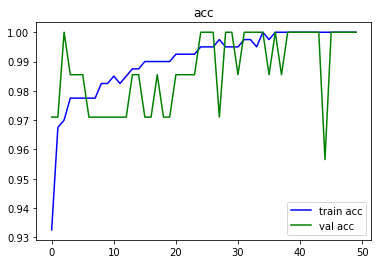

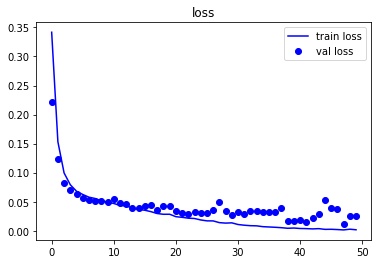

In [43]:
import matplotlib.pyplot as plt

# history_dict = history.history
# history_dict

plt.title("acc")
plt.plot(history.history["acc"], 'b', label= "train acc")
plt.plot(history.history["val_acc"], 'g', label= "val acc")
plt.legend()
plt.show()

plt.title("loss")
plt.plot(history.history["loss"], 'b', label= "train loss")
plt.plot(history.history["val_loss"], 'bo', label= "val loss")
plt.legend()
plt.show()